In [ ]:
# a ML model to find the insurance bills of a person
#medical cost prediction using ML
#we are using regression algorithms to predict the medical cost
#the algorithms we will be using to check which gives more accaracy linear regression,support vector regression,decision tree,random forest
#raw data->pre processing->data scaling and extractio->ml modeling->compare and select he best model->evaluate result

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.shape

(1338, 7)

In [9]:
data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [13]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
data.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [19]:
#preprocessing
from sklearn.preprocessing import LabelEncoder #labelEncoder coverts the values to numeric values
lab=LabelEncoder()
data['sex']=lab.fit_transform(data['sex'])
data['smoker']=lab.fit_transform(data['smoker'])
data['region']=lab.fit_transform(data['region'])

In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: xlabel='smoker', ylabel='count'>

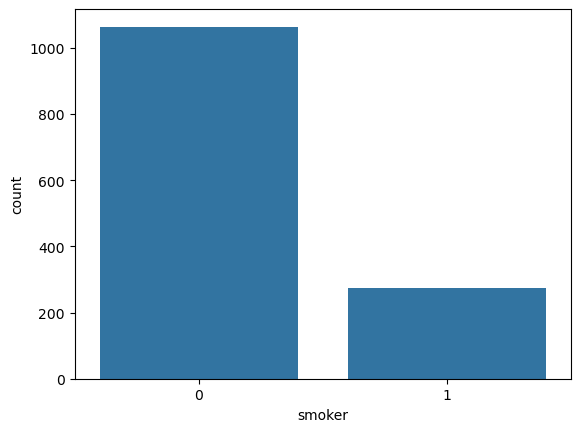

In [25]:
#data exploration
sns.countplot(x='smoker',data=data)


<Axes: xlabel='sex', ylabel='count'>

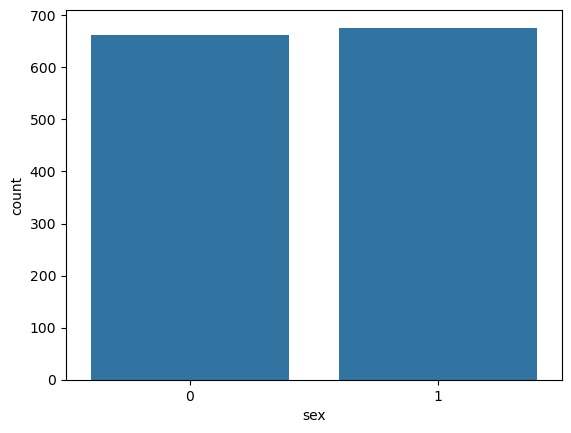

In [27]:
sns.countplot(x='sex',data=data)

In [29]:
#data spliting


#x is input here our data set features like age,gender,name and y is the output here it is the medical cost we are predicting
x=data.iloc[:,data.columns!='charges']
y=data.iloc[:,data.columns=='charges']
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,roc_curve,auc
#auc=area under curve 
#roc=receiver optimistic 

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
xtrain.head()
ytrain.head()

,charges
729,6781.35420
968,3279.86855
227,24227.33724
1085,19023.26000
917,35069.37452


In [35]:
#random forest regressor

from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300,random_state=0)
#n estimators means how many times predict the value like that
regressor.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=300, random_state=0)

In [43]:
y_pred=regressor.predict(xtest)
#y_pred

In [47]:
from sklearn import metrics
from sklearn.metrics import r2_score

print("\n\n r2_score is ",r2_score(y_pred,ytest))



 r2_score is  0.841024764352265


In [49]:
#linear regression

from sklearn.linear_model import LinearRegression
alg=LinearRegression()
alg.fit(xtrain,ytrain)
y_predict=alg.predict(xtest)
print("r2_score is",r2_score(y_pred,ytest))

r2_score is 0.841024764352265


In [55]:
# decision tree regressor
from sklearn import tree
dt=tree.DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
x_predicted=dt.predict(xtest)
print("\n\n r2_score is",r2_score(x_predicted,ytest))



 r2_score is 0.7069527790079377


In [57]:
#SVR

from sklearn.svm import SVR
regressor=SVR()
regressor.fit(xtrain,ytrain)
predicted=regressor.predict(xtest)
print('\n r2_score is ',r2_score(predicted,ytest))


 r2_score is  -33432.02022081083


In [61]:
#prediction on new vector

test_vector=np.reshape(np.asarray([19,0,27.900,0,1,3]),(1,6))
p=int(regressor.predict(test_vector)[0])
p

9534

In [ ]:
#steps in ml project
#data collection
#data pre processing
#data exploration or data visualisation
#model selection(selecting appropriate algorithm )
#model training
#model evaluation(testing the model selected for its accuracy)
#model deployement

In [ ]:
#assignment 
create a chabot using python